In [1]:
import os
import glob as glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [28]:
image_bp = sorted(glob.glob('/content/baseballplayer.jpg'))
image_cc = sorted(glob.glob('/content/cat.jpg'))
image_c = sorted(glob.glob('/content/car.jpg'))

(-0.5, 735.5, 459.5, -0.5)

<Figure size 1000x1000 with 0 Axes>

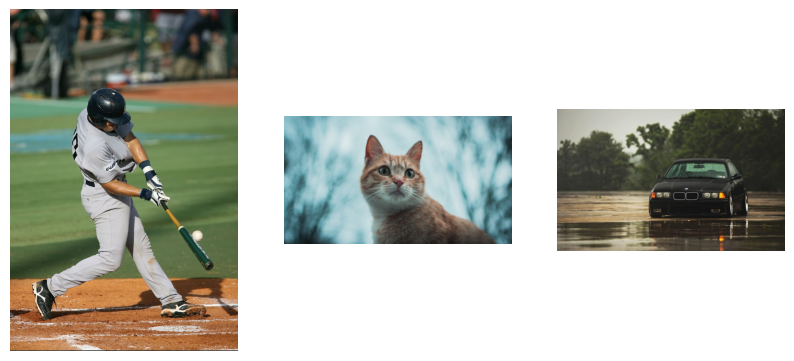

In [29]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(plt.imread(image_bp[0]))
ax[0].axis('off')

ax[1].imshow(plt.imread(image_cc[0]))
ax[1].axis('off')

ax[2].imshow(plt.imread(image_c[0]))
ax[2].axis('off')

In [9]:
model_vgg16 = tf.keras.applications.vgg16.VGG16()
model_resnet50 = tf.keras.applications.resnet50.ResNet50()
model_inceptionv3 = tf.keras.applications.inception_v3.InceptionV3()

96112376/96112376 [==============================] - 1s 0us/step


In [11]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inceptionv3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


In [21]:
def processing_images(model, imagepath, size, preprocess_input):
  plt.figure(figsize=(10,10))
  tfimage = tf.io.read_file(imagepath)
  decoded_image = tf.image.decode_image(tfimage)
  image_resized = tf.image.resize(decoded_image, size)
  image_btch = tf.expand_dims(image_resized, axis=0)
  image_btch = preprocess_input(image_btch)
  pred = model.predict(image_btch)

  decoded_pred = tf.keras.applications.imagenet_utils.decode_predictions(pred, top=5)
  plt.imshow(decoded_image)
  plt.axis('off')
  label = decoded_pred[0][0][1]
  confidence = decoded_pred[0][0][2]
  title = label+' '+str('{:.2f}%'.format(confidence))
  plt.title(title, fontsize=16, fontweight='bold')
  plt.show()

1/1 [==============================] - 1s 881ms/step


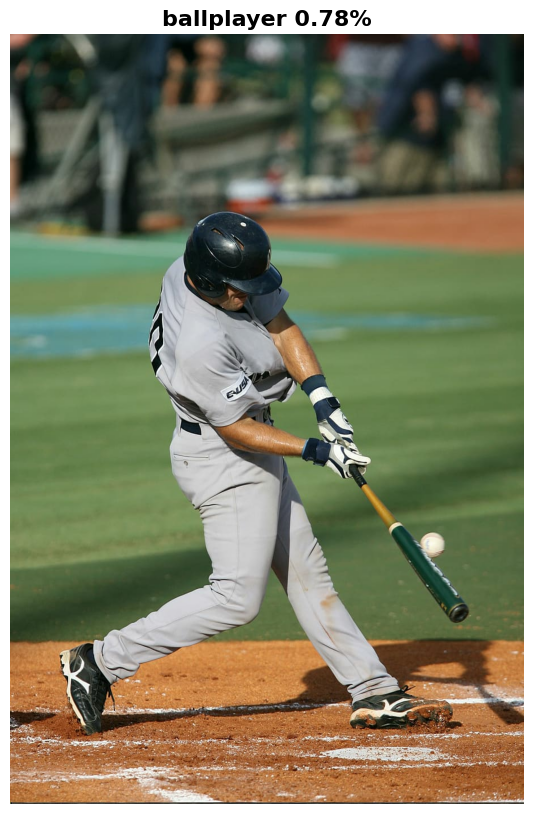

1/1 [==============================] - 1s 608ms/step


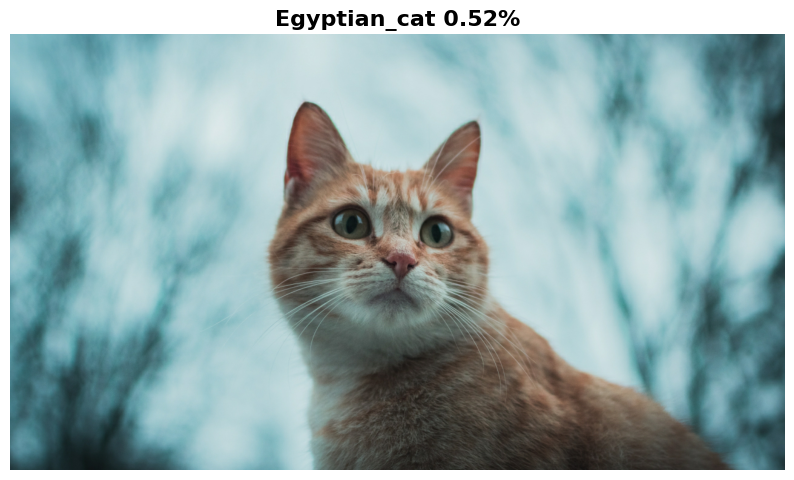

1/1 [==============================] - 1s 902ms/step


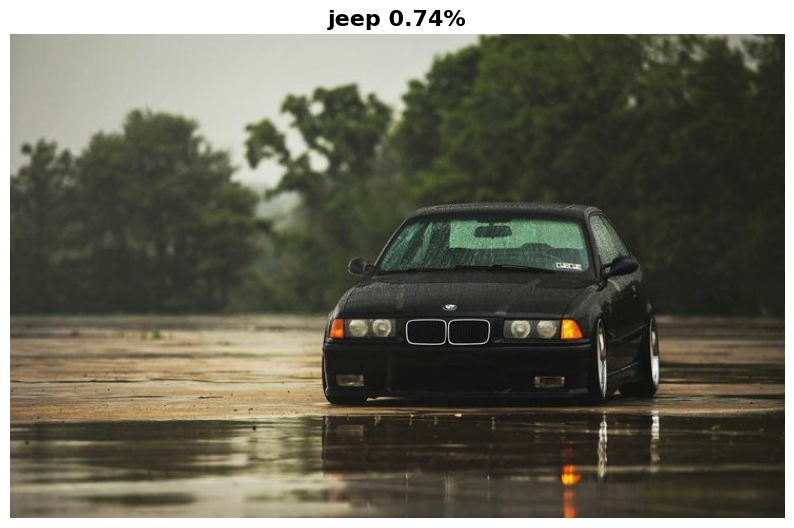

In [30]:
model1 = model_vgg16
size = (224, 224)
preprocess_input = tf.keras.applications.vgg16.preprocess_input
processing_images(model1, image_bp[0], size, preprocess_input)
processing_images(model1, image_cc[0], size, preprocess_input)
processing_images(model1, image_c[0], size, preprocess_input)

1/1 [==============================] - 0s 395ms/step


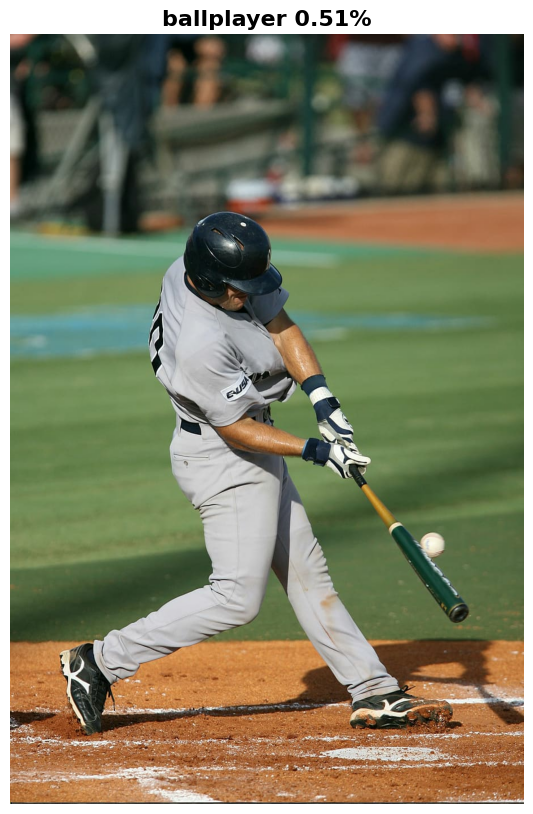

1/1 [==============================] - 1s 537ms/step


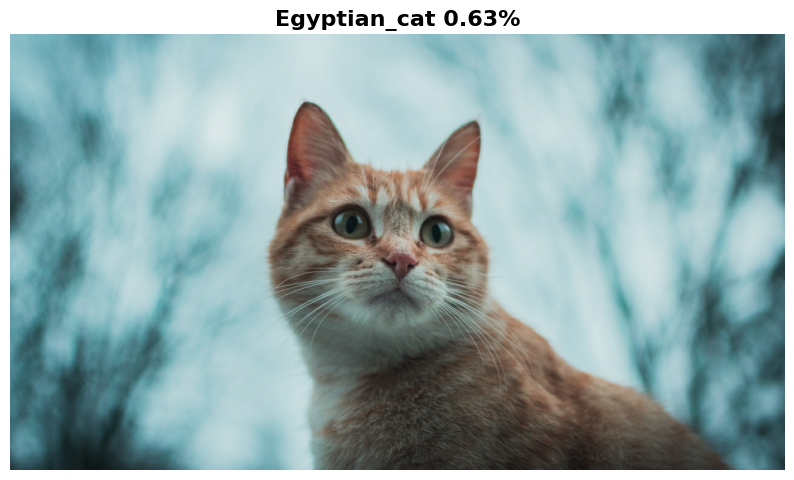

1/1 [==============================] - 0s 408ms/step


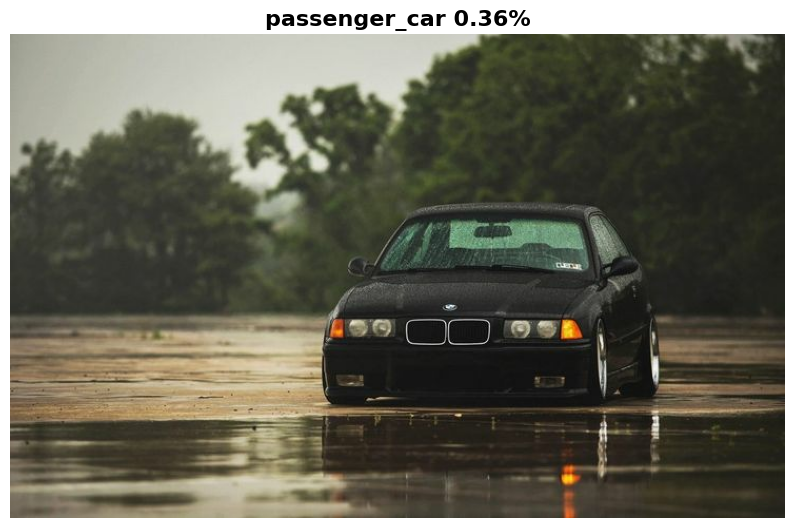

In [31]:
model2 = model_resnet50
size = (224, 224)
preprocess_input = tf.keras.applications.resnet50.preprocess_input
processing_images(model2, image_bp[0], size, preprocess_input)
processing_images(model2, image_cc[0], size, preprocess_input)
processing_images(model2, image_c[0], size, preprocess_input)

1/1 [==============================] - 0s 221ms/step


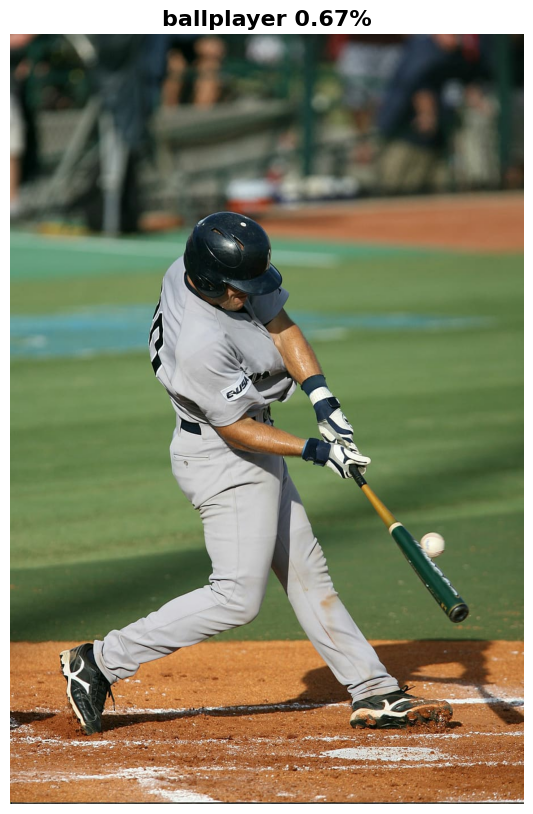

1/1 [==============================] - 0s 232ms/step


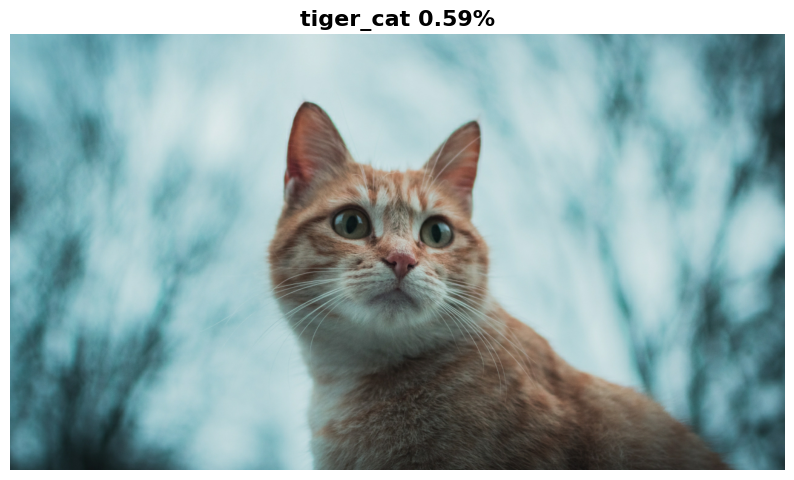

1/1 [==============================] - 0s 236ms/step


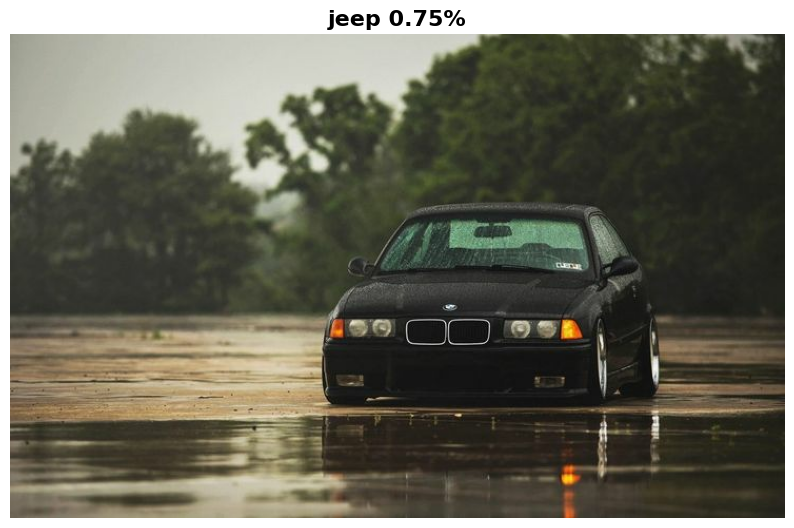

In [32]:
model3 = model_inceptionv3
size = (299, 299)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input
processing_images(model3, image_bp[0], size, preprocess_input)
processing_images(model3, image_cc[0], size, preprocess_input)
processing_images(model3, image_c[0], size, preprocess_input)